<h1> Analyzing Fremont Bridge Sidewalk Traffic

<h2> Part 1: In Depth Study of September 2015

In [1]:
#Jacob Richey, Big Data, 9/20/16

import statistics as stat

data_file = open("FreBridge1.csv", "r");
#create an empty list to store the data
data_list = [];
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii);

#remove the first element (column header)
del data_list[0];
#create empty lists for westbound and eastbound bikes
west = [];
east = [];    
for jj in range(len(data_list)):
    #make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #add data to specific lists for west and east
    west.append(int(data_list[jj][1]));
    east.append(int(data_list[jj][2]));
    
print("West Sidewalk Statistics")
print("The mean of the West is: ", round(stat.mean(west), 2))
print("The median of the West is: ", stat.median(west))
print("There is no mode - 30 equally common values")

print()
print("East Sidewalk Statistics")
print("The mean of the East is: ", round(stat.mean(east), 2))
print("The median of the East is: ", (stat.median(east)))
print("There is no mode - 30 equally common values")

West Sidewalk Statistics
The mean of the West is:  1497.57
The median of the West is:  1573.5
There is no mode - 30 equally common values

East Sidewalk Statistics
The mean of the East is:  1540.43
The median of the East is:  1648.0
There is no mode - 30 equally common values


The data set is from the bike-counter on the Fremont Bridge. 


The mean represents the average number of pedestrians/bikers crossing the bridge (on the West or East sidewalk) per day for the month of September (the duration of the data set). 
The median gives the middle number of pedestrian/biker crossings when the data is arranged by magnitude. 
The mode calculates how many times the number of people that crossed the bridge was the same on different days.

The purpose of the analysis determines whether mean or median would be better. 
If we want to find the raw average number of crossings per day, for example for maintenance purposes, then mean would be sufficient. 
However, if we want to find average weekday traffic, it would make more sense to take the median, because it would disregard the low outliers on the weekends. OR, as I've calculated below, take a seperate mean for weekdays and weekends.

The mode tells us very little in this data set because it doesn't really matter if the number of people that crossed the bridge happened to repeat itself a couple of days. 

From these calculations I can clearly see there are slightly more people that cross East rather than West, but by such a small amount I wouldn't read too much into it. 

Other calculations I might make if I had more data would be to overlay holidays with the bridge traffic, to see if there is a correlation. Certainly a larger data set would allow me to do more as well. I might compare weather with the bridge traffic to see how heavily it is affected by good/bad weather.

In [2]:
allData = []

for i in range(len(west)):
    allData.append(west[i]+east[i])
    
mon = []
tue = []
wed = []
thur = []
fri = []
sat = []
sun = []
 
for x in range(0, 29, 7):
    tue.append(allData[x])
    wed.append(allData[x+1])
    if(x<28):
        thur.append(allData[x+2])
        fri.append(allData[x+3])
        sat.append(allData[x+4])
        sun.append(allData[x+5])
        mon.append(allData[x+6])
    

print("Bridge Traffic Analysis")
print("Avg. Monday Traffic: ", stat.mean(mon))
print("\tMax Crossing Number: ", max(mon))
print("Avg. Tuesday Traffic: ", stat.mean(tue))
print("\tMax Crossing Number: ", max(tue))
print("Avg. Wednesday Traffic: ", stat.mean(wed))
print("\tMax Crossing Number: ", max(wed))
print("Avg. Thursday Traffic: ", stat.mean(thur))
print("\tMax Crossing Number: ", max(thur))
print("Avg. Friday Traffic: ", stat.mean(fri))
print("\tMax Crossing Number: ", max(fri))
print("Avg. Saturday Traffic: ", stat.mean(sat))
print("\tMax Crossing Number: ", max(sat))
print("Avg. Sunday Traffic: ", stat.mean(sun))
print("\tMax Crossing Number: ", max(sun))

print()
print("Avg. Weekday Traffic: ", (stat.mean(mon)+stat.mean(tue)+stat.mean(wed)+stat.mean(thur)+stat.mean(fri))/5)
print("Avg. Weekend Traffic: ", (stat.mean(sat)+stat.mean(sun))/2)

Bridge Traffic Analysis
Avg. Monday Traffic:  3239
	Max Crossing Number:  3862
Avg. Tuesday Traffic:  3817
	Max Crossing Number:  4551
Avg. Wednesday Traffic:  4054.6
	Max Crossing Number:  4562
Avg. Thursday Traffic:  3490.75
	Max Crossing Number:  4321
Avg. Friday Traffic:  3095.5
	Max Crossing Number:  3761
Avg. Saturday Traffic:  1847.25
	Max Crossing Number:  2191
Avg. Sunday Traffic:  1273
	Max Crossing Number:  1571

Avg. Weekday Traffic:  3539.37
Avg. Weekend Traffic:  1560.125


In my further calculations above, I can conclude that Wednesday averages the highest traffic (4054.6 per day), and also holds the crossing high for the month (4562 crossers). Another calculation I made that I found was interesting is the difference between the average weekday and weekend traffic. Significantly more people cross on weekdays, indicating the majority of crossers are crossing to get to work. 

<h2> Part 2: Mass Data Study from October 2012 to August 2016

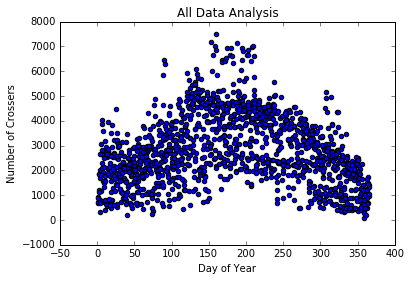

In [3]:
#Jacob Richey, Big Data, 9/20/16

data_file = open("FreBridge2.csv", "r");
#create an empty list to store the data
data_list = [];
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii);

#remove the first element (column header)
del data_list[0];
#create empty lists for westbound and eastbound bikes
allData = [];
for jj in range(len(data_list)):
    #make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #add data to specific lists for west and east
    allData.append(int(data_list[jj][1])+int(data_list[jj][2]));

dayNumber = []

for x in range(len(allData)):
    dayNumber.append((x+275)%365)
    dayNumber[x] = dayNumber[x]+1
    


import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(dayNumber, allData)
plt.title("All Data Analysis")
plt.xlabel("Day of Year")
plt.ylabel("Number of Crossers")

The data set for part two ranges from October 2012 to August 2016. My goal is to estimate as accurately as possible the total number of crossers on Friday September 30, 2016. I'll start simple, and gradually refine my search until I have a good estimation. I don't care about a distinction between West and East crossers for this section, I just want to predict the TOTAL number of crossers on Sep 30 - thus I combined the two sides immediately in my code. 

Displayed above is a scatter plot of the entire data set. The x axis is the day of the year, for example Jan 2 would be 2, while Dec 30 would be 364. The y axis is the number of crossers. The graph displays the variation that occurs during the year for the number of crossers, spiking in the middle of the year (the summer), and decreasing at the beginning and end of the year. It forms a concave down curve. 

In [4]:
mon = []
tue = []
wed = []
thur = []
fri = []
sat = []
sun = []
 
for x in range(0, 1429, 7):
    wed.append(allData[x])
    if(x < 1428):
        thur.append(allData[x+1])
        fri.append(allData[x+2])
        sat.append(allData[x+3])
        sun.append(allData[x+4])
        mon.append(allData[x+5])
        tue.append(allData[x+6])
        
print("Bridge Traffic Analysis by Day")
print("Avg. Monday Traffic: ", round(stat.mean(mon), 2))
print("Avg. Tuesday Traffic: ", round(stat.mean(tue), 2))
print("Avg. Wednesday Traffic: ", round(stat.mean(wed), 2))
print("Avg. Thursday Traffic: ", round(stat.mean(thur), 2))
print("Avg. Friday Traffic: ", round(stat.mean(fri), 2))
print("Avg. Saturday Traffic: ", round(stat.mean(sat), 2))
print("Avg. Sunday Traffic: ", round(stat.mean(sun), 2))

print()
print("Avg. Total Crossers: ", round(stat.mean(allData), 2))

Bridge Traffic Analysis by Day
Avg. Monday Traffic:  3231.15
Avg. Tuesday Traffic:  3464.9
Avg. Wednesday Traffic:  3463.08
Avg. Thursday Traffic:  3279.99
Avg. Friday Traffic:  2931.95
Avg. Saturday Traffic:  1595.27
Avg. Sunday Traffic:  1521.29

Avg. Total Crossers:  2784.42


In depth analysis of average number of bridge crossers per day show there is a significant difference in the number of crossers on Friday versus other days. I want to predict the bridge traffic on a Friday, so therefore, from now on we will analyze Friday Data on it's own. This will allow me to work with data that will be most similar to the date I want to predict. 

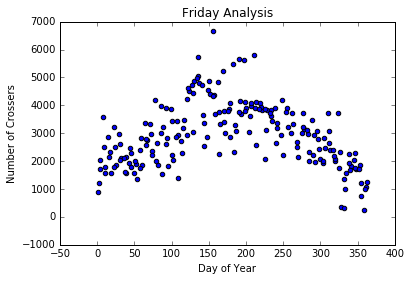

In [5]:
fridayDayNumbers = []
    
for x in range(len(fri)):
    fridayDayNumbers.append(((x*7)+277)%365)
    fridayDayNumbers[x] = fridayDayNumbers[x]+1
    
plt.scatter(fridayDayNumbers, fri)
plt.title("Friday Analysis")
plt.xlabel("Day of Year")
plt.ylabel("Number of Crossers")

Displayed is a scatter plot of Friday data only. The set up is the same as the scatter plot of all data above. The general trend seems to follow the same pattern of spiking in the middle of the year. I would like to analyze the correlation between mean temperature of the day / precipitation and number of crossers, but I cannot find that data in a usable format. 

NOTE FOR MS. ANDERSON: HOW CAN I CALCULATE A BEST FIT EQUATION AND LINE? thank you for reading through all this!